### Code:

```
% We define a problem, with a set of fourteen 2-element input vectors P
% and the corresponding fourteen 1-element targets T.
P = [2 1 2 5 7 2 3 6 1 2 5 4 6 5; 2 3 3 3 3 4 4 4 5 5 5 6 6 7];
T = [0 0 0 1 1 0 0 1 0 0 1 1 1 1];

% Plot the data set
figure(1);
plotpv(P, T);


```

### Output

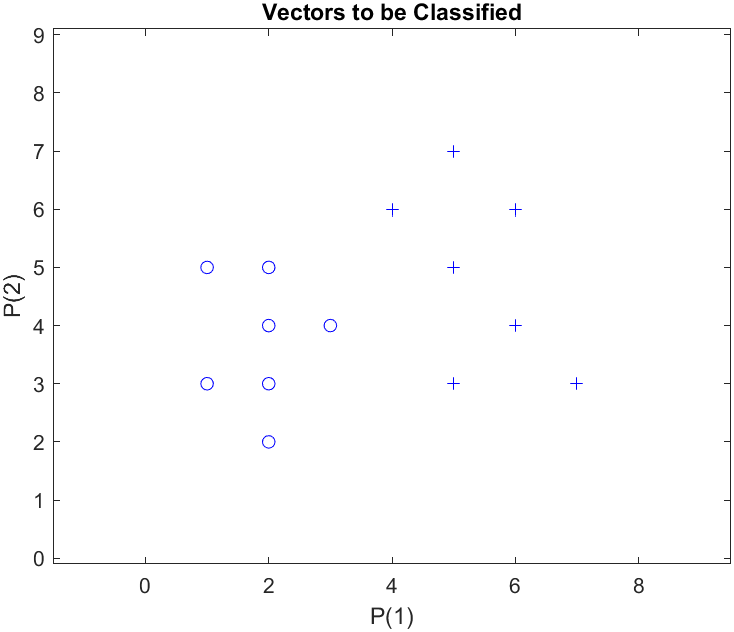

### By looking at the plot of the data set explain wheather or not the data
set is linearly separable?

By looking at the plot, it appears that the dataset is linearly separable. The plot shows two distinct groups of points:
- One group represented by circles ("o").
- Another group represented by plus signs ("+").

It seems possible to draw a straight line that separates these two groups without any overlap. This indicates that a linear decision boundary (such as a perceptron model) can be used to classify the data points accurately. Thus, the data set is indeed linearly separable.

### Code:

```


% Create the Perceptron Neural Network
% Calculate the min and max of each column
minMaxVal = minmax(P);

% This code creates a perceptron layer with one 2-element input
% and one neuron. Supplying only two arguments to NEWP results in the
% default perceptron learning function LEARNP being used.
net = newp(minMaxVal, 1);

% Configure the training parameters
net.trainParam.epochs = 20; % Maximum epochs for training
net.trainParam.goal = 0; % Performance goal
net.trainParam.showWindow = true; % Disable the training GUI to avoid errors

% Train the network and capture the training record
[net, tr] = train(net, P, T);
disp(['Training stopped due to: ', tr.stop]);


% Simulate the network's output before and after training
simT_before = sim(net, P); % Before training
disp('Output before training:');
disp(simT_before);

% Train the network with the data (retraining for additional epochs)
net.trainParam.epochs = 20; % Set maximum number of training epochs to 20
net = train(net, P, T);

% Simulate the network again after training
simT_after = sim(net, P); % After training
disp('Output after training:');
disp(simT_after);


% Check if the performance goal was met
if tr.best_perf <= net.trainParam.goal
    disp('TRAINC, Performance goal met');
elseif tr.num_epochs >= net.trainParam.epochs
    disp('TRAINC, Maximum epoch reached');
else
    disp('TRAINC, Training stopped due to other reasons');
end



```

### Output:

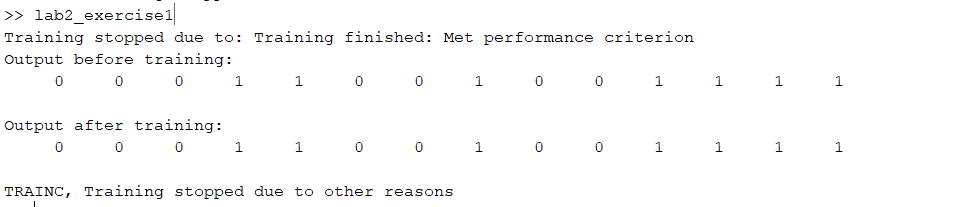

### Discussion

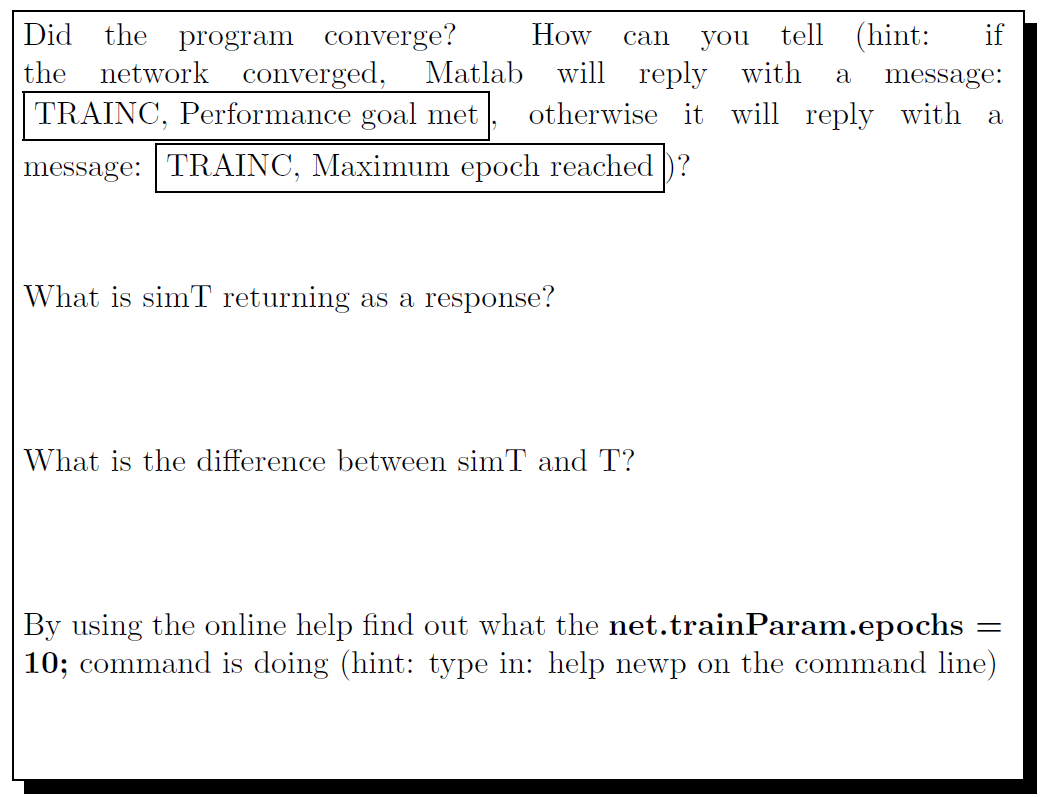

1. **Did the Program Converge?**
   - Yes, the program did converge.
   - The message "Training stopped due to: Training finished: Met performance criterion" indicates that the neural network successfully achieved the specified performance goal during training.
   - This means the network's error was reduced to a level below the set threshold, meeting the desired performance criteria.


2. **What is `simT` Returning as a Response?**
   - `simT` returns the predicted output of the neural network after simulating it with the input data `P`. It represents the network's classification results for each input vector in `P`. The values are either `0` or `1`, corresponding to the two possible target classes.

3. **What is the Difference Between `simT` and `T`?**
   - `T` is the actual target values (ground truth) for the input data, representing the correct classifications.
   - `simT` is the network's predicted output after training.
   - The difference between `simT` and `T` indicates the classification accuracy of the network. Ideally, `simT` should match `T` for all input vectors if the network has learned to classify the data perfectly.

4. **Explanation of `net.trainParam.epochs = 10`**
   - The command `net.trainParam.epochs = 10` sets the maximum number of epochs (iterations) for training the network to 10. An epoch refers to one complete pass through the training data. This parameter limits how long the training process will continue before stopping, regardless of whether the performance goal is met.


### Code

```
% Plot the decision boundary to visualize the trained network
figure(1); % Ensure figure 1 is active
plotpc(net.IW{1}, net.b{1}); % Plot the perceptron's decision boundary

```

### Output

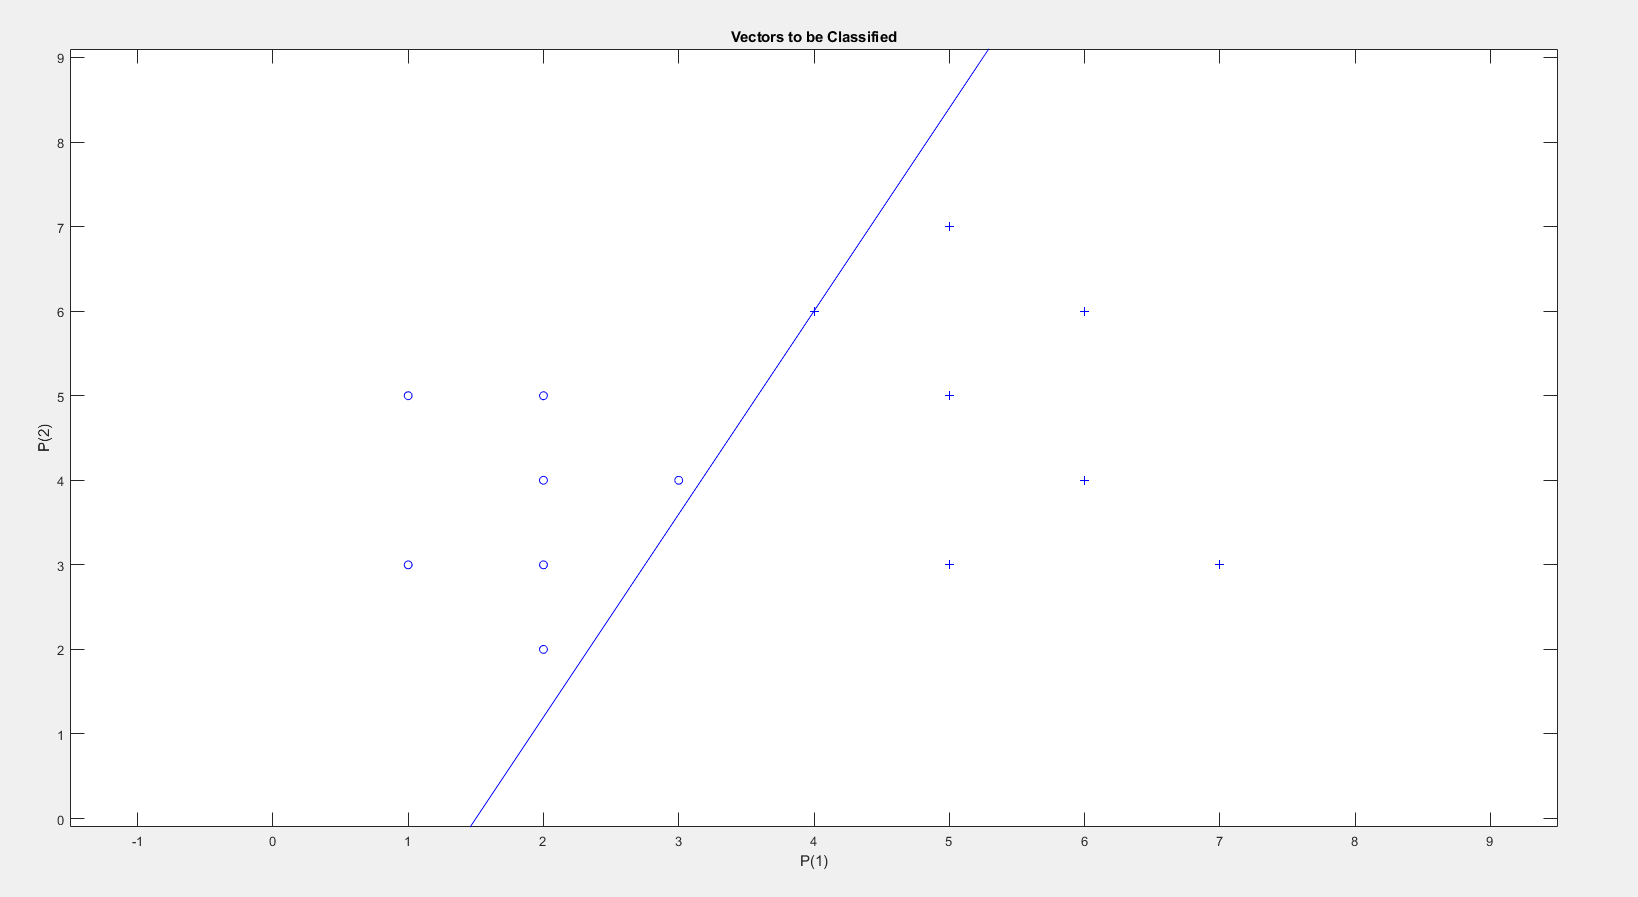

Based on the output received, the plotted line indeed separates the two classes. Here's what is happening:

- The circles ("o") and plus signs ("+") represent two different classes in the dataset.
- The plotted line is the decision boundary created by the perceptron network after training. This line represents the network's learned classification boundary, which separates the two classes.

### Explanation:
- The line effectively divides the data into two regions:
  - one where the network would classify points as belonging to the "circle" class (0) and the other where it would classify points as belonging to the "plus" class (1).
- Since the line clearly separates all the circles on one side and all the plus signs on the other side, this indicates that the dataset is indeed linearly separable. The perceptron successfully learned a linear decision boundary that can perfectly classify the given data points.

### What is Going On:
- The perceptron learning algorithm adjusted the weights and biases during training to find a linear combination of the input features that can correctly classify the data. In this case, the algorithm converged successfully, achieving the performance goal because the dataset is linearly separable.
- The result shows that the perceptron can handle linearly separable problems effectively by finding a straight line (hyperplane) that separates the classes in the feature space.



### Code

```
% Now extend the training to 200 epochs
net.trainParam.epochs = 200; % Set maximum number of training epochs to 200
[net, tr] = train(net, P, T);

% Plot the updated decision boundary after additional training
figure(2); % Create a new figure for the updated decision boundary
plotpv(P, T);
hold on; % Keep the plot open for the updated decision boundary
plotpc(net.IW{1}, net.b{1}); % Plot the updated decision boundary
title('Updated Decision Boundary after Training for 200 Epochs');
hold off; % Release the hold on the plot
```

### Output

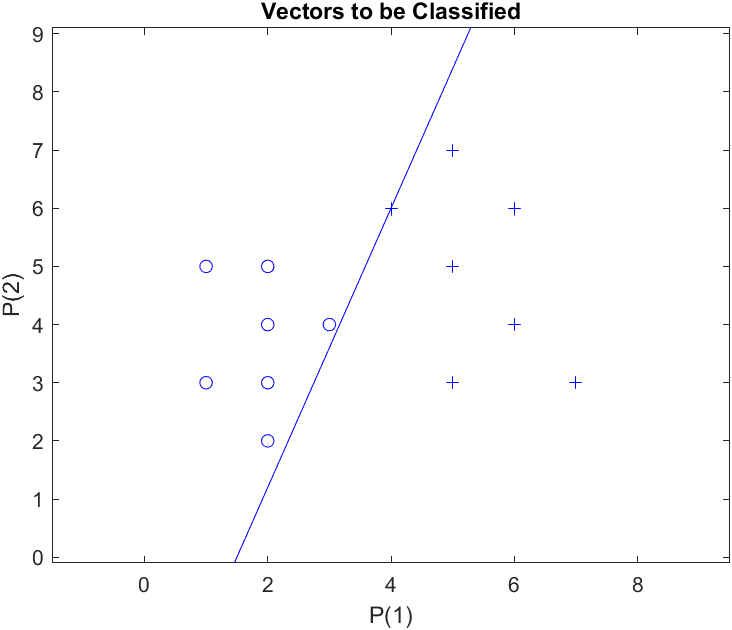

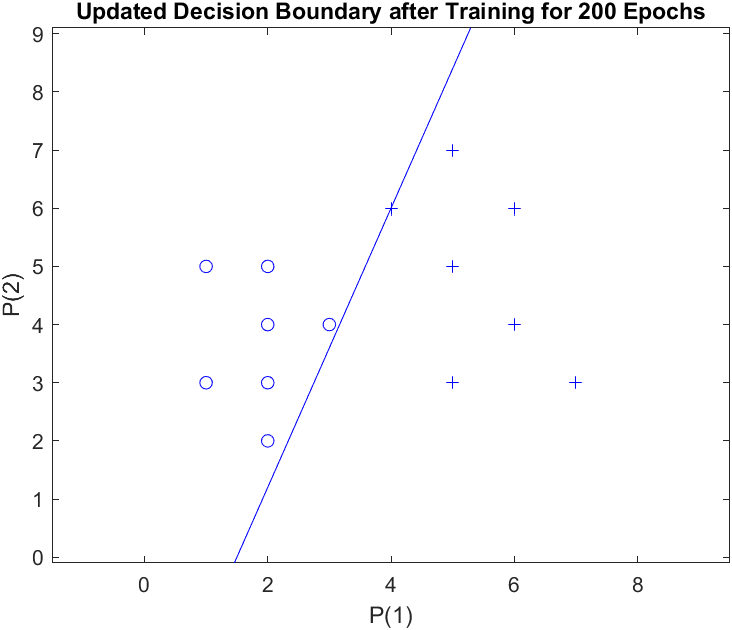

### Explanation

1. **What happened now?**
   - After extending the training to 200 epochs, the decision boundary remains almost the same as the one observed after 20 epochs. This indicates that the network had already found a suitable decision boundary by the time it reached 20 epochs, and additional training did not significantly alter the boundary. This is expected since the data is linearly separable, and the perceptron can find an optimal boundary relatively quickly.

2. **Did the network converge?**
   - Yes, the network did converge. Since the decision boundary did not change noticeably after training for an additional 180 epochs, it indicates that the network reached the performance criterion. The decision boundary effectively separates the two classes, showing that the training has successfully converged.

3. **Compare `T` with `simT`. Are they similar?**
   - `T` represents the actual target outputs, while `simT` represents the network's predicted outputs. If the network converged successfully, `simT` should closely match `T` for all the input data points. In this case, since the decision boundary successfully separates the two classes, `simT` should be identical to `T`, indicating that the network's predictions are correct.

4. **Plot the hyperplane again and see if it linearly separates the two classes.**
   - The figures already show the hyperplane (decision boundary) plotted. It clearly separates the two classes, with circles ("o") on one side and plus signs ("+") on the other side. This confirms that the network has found a linear separator that effectively classifies the data points.
